In [5]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 28: Regression

In [6]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo

In [7]:
def trial_line():
    plots.figure(figsize=(7,7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x_demo, y_demo, s=10)
    #plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
    plots.plot([-4,4],[-4,4], color='r', lw=2)
    #plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.xlabel('x in standard units')
    plots.ylabel('y in standard units');

In [8]:
def trial_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)

In [9]:
def both_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)

In [10]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(7, 7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

In [11]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [12]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()   

In [13]:
heights_with_predictions = heights.with_column(
    'Original Prediction', heights.apply(predict_child, 'MidParent')
    )

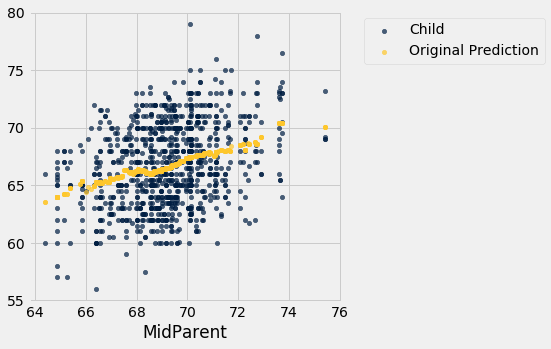

In [14]:
heights_with_predictions.scatter('MidParent')

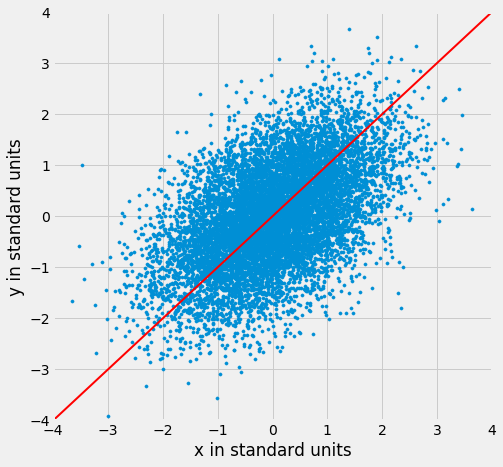

In [15]:
trial_line()

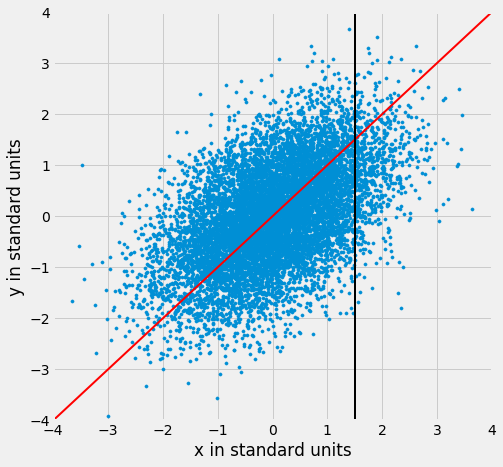

In [16]:
trial_with_vertical()

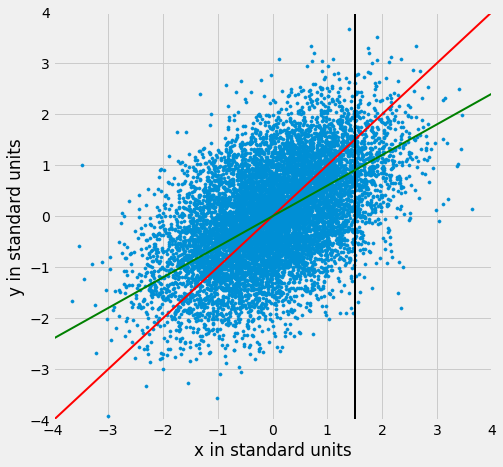

In [17]:
both_with_vertical()

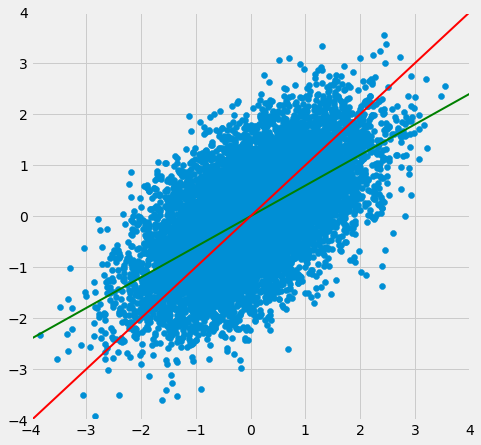

In [18]:
regression_line(0.6)

In [19]:
def standard_units(some_array):
    return (some_array - np.average(some_array))/np.std(some_array)

def correlation(t, x, y):
    return np.average(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(t, x, y):
    r = correlation(t, x, y)
    return r*np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    return np.average(t.column(y)) - slope(t, x, y)*np.average(t.column(x))

In [20]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [21]:
heights.take(123)

MidParent,Child
69.48,71.5


In [22]:
galton_slope*69.48 + galton_intercept

66.92007567102915

In [23]:
heights_with_predictions.where('MidParent', are.equal_to(69.48))

MidParent,Child,Original Prediction
69.48,64,66.7588
69.48,74,66.7588
69.48,72,66.7588
69.48,69,66.7588
69.48,67.5,66.7588
69.48,63.5,66.7588
69.48,72,66.7588
69.48,71.5,66.7588
69.48,71.5,66.7588
69.48,70,66.7588


In [24]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', galton_slope*heights.column('MidParent') + galton_intercept
)
heights_with_predictions

MidParent,Child,Original Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


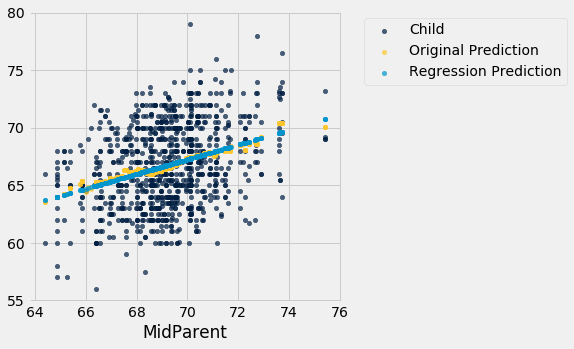

In [25]:
heights_with_predictions.scatter('MidParent')